In [63]:
using PyPlot
using PyCall
using CSV,DataFrames
pushfirst!(PyVector(pyimport("sys")["path"]), "")
@pyimport product_quad as pq
include("sweep2d.jl")

RT_Solve_DMD (generic function with 1 method)

In [84]:
x0 = 400
Nx = 10
Ny = 5
Lx = 2*x0
Ly = 50
hx = Lx/Nx
hy = Ly/Ny

dx = hx
#make x
x = range(-Lx/2+dx/2,stop=Lx/2-dx/2,length=Nx)#linspace(-Lx/2+dx/2,(Lx/2-dx/2),Nx)

Nord = 2
w,etax,etay = pq.prod_quad(Nord)
angles = length(w)
boundaryx = zeros(angles) .+ 0#+ 1/np.sum(w)
boundaryy = zeros(angles) .+ 0#+ 1/np.sum(w)

sigma = zeros((Nx,Ny,4)) .+ 1
Q = zeros((Nx,Ny,4,angles))
source_spots = findall(x-> abs.(x)<= x0,x)
Q[source_spots,:,:,:] .= 1.0 /sum(w) *(a*c)*800


psi_init = Q*0
T_init = zeros((Nx,Ny,4)) .+ 1.0e-8
v = c
Tfinal =0.3/c
dt = 0.00001 #hx/c
cv_val = 0.03
println("cv = ", cv_val)
# Cv(T,density) = cv_val .+ 0.0*4*a*T.^3
Cv(T,density) = 4 * a * T.^3
# eos(T,density) = cv_val .*T
eos(T,density) = a * T.^4
# inveos(e,density) = e/cv_val #(e/a).^.25
inveos(e, density) = (e/a).^.25
L2tol = 1e-5
Linftol = 1e-2
phi_sol = nothing
Q_func(t) = ifelse(t <= (0.0125/c),Q,Q .* 0)
sigma_func(T,density) = 1.0*sigma
density = sigma
K = 3
Rits = 3
psi,phi_sol, T, times, iteration = RT_Solve_DMD(Nx,Ny,hx,hy,psi_init,T_init,Nord,density,sigma_func,Q_func,Cv,
                        inveos,eos,v,dt,Tfinal,
             boundaryx, boundaryy, LOUD = 1);

cv = 0.03
Iteration: 1 Rich: 1 Resid= 14.142135623730942 1.0 false
Iteration: 1 Rich: 2 Resid= 1.131465134829533e-9 8.944972793134554e-6 false
Total iterations is 2
time = 1.0e-5
Iteration: 1 Rich: 1 Resid= 3.524917088049687 0.49925788855819453 false
Iteration: 1 Rich: 2 Resid= 2.820193965589904e-10 4.465868232994552e-6 false
Total iterations is 2
time = 2.0e-5
Iteration: 1 Rich: 1 Resid= 1.5619229881357226 0.33234433572060673 false
Iteration: 1 Rich: 2 Resid= 1.2496574732367876e-10 2.972828795244631e-6 false
Total iterations is 2
time = 3.0000000000000004e-5
Iteration: 1 Rich: 1 Resid= 0.8759524966472544 0.24888959963762214 false
Iteration: 1 Rich: 2 Resid= 7.008298339867186e-11 2.2263256551635635e-6 false
Total iterations is 2
time = 4.0e-5
Iteration: 1 Rich: 1 Resid= 0.0001276020764593725 0.0031610085933182486 false
Iteration: 1 Rich: 2 Resid= 1.0209133265981211e-14 2.8269897978105973e-8 false
Total iterations is 2
time = 5.0e-5
Iteration: 1 Rich: 1 Resid= 0.00012703311664685534 0.0

Iteration: 1 Rich: 1 Resid= 9.993090454313065e-5 0.0028138818250993403 false
Iteration: 1 Rich: 2 Resid= 7.99522344802355e-15 2.5165433514828806e-8 false
Total iterations is 2
time = 0.0004400000000000005
Iteration: 1 Rich: 1 Resid= 9.926804787206493e-5 0.0028049836709691522 false
Iteration: 1 Rich: 2 Resid= 7.942189715976255e-15 2.5085854504780514e-8 false
Total iterations is 2
time = 0.00045000000000000053
Iteration: 1 Rich: 1 Resid= 9.860788269587553e-5 0.002796090694899833 false
Iteration: 1 Rich: 2 Resid= 7.889371362336372e-15 2.5006321680010046e-8 false
Total iterations is 2
time = 0.00046000000000000056
Iteration: 1 Rich: 1 Resid= 9.795041533843778e-5 0.0027872030514655144 false
Iteration: 1 Rich: 2 Resid= 7.836768857410615e-15 2.4926836816874243e-8 false
Total iterations is 2
time = 0.0004700000000000006
Iteration: 1 Rich: 1 Resid= 9.729565194291165e-5 0.0027783208948646276 false
Iteration: 1 Rich: 2 Resid= 7.784382717167299e-15 2.4847400803551523e-8 false
Total iterations is 2

Iteration: 1 Rich: 1 Resid= 7.391450043976696e-5 0.0024377884268487193 false
Iteration: 1 Rich: 2 Resid= 5.913709642159324e-15 2.1801911387342443e-8 false
Total iterations is 2
time = 0.0008700000000000016
Iteration: 1 Rich: 1 Resid= 7.337089736850066e-5 0.002429246632415172 false
Iteration: 1 Rich: 2 Resid= 5.870217207895321e-15 2.172551938350864e-8 false
Total iterations is 2
time = 0.0008800000000000017
Iteration: 1 Rich: 1 Resid= 7.283009905583618e-5 0.0024207162015887906 false
Iteration: 1 Rich: 2 Resid= 5.826949138266406e-15 2.1649229076103893e-8 false
Total iterations is 2
time = 0.0008900000000000017
Iteration: 1 Rich: 1 Resid= 7.229210445873844e-5 0.0024121972641411027 false
Iteration: 1 Rich: 2 Resid= 5.783905440319722e-15 2.1573041575351226e-8 false
Total iterations is 2
time = 0.0009000000000000017
Iteration: 1 Rich: 1 Resid= 7.175691237930607e-5 0.0024036899490840202 false
Iteration: 1 Rich: 2 Resid= 5.7410859645670356e-15 2.1496957991473664e-8 false
Total iterations is 2


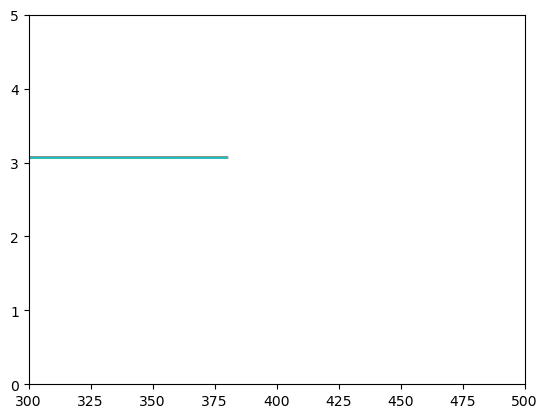

(0.0, 5.0)

In [90]:
x,y,phi_flat = flatten_phi((T[:,:,:,end-1]),Nx,Ny,hx,hy)
plot(x .- Lx/2,(phi_flat[:,Int64(round(Ny/2))]/a).^.25)
# CSV.write("T_cv31.csv", (data=phi_flat[:,Int64(round(Ny/2))],))
plt.xlim(300,500)
plt.ylim(0,5)

In [83]:
println(size(phi_sol))
x,y,phi_flat = flatten_phi(phi_sol[:,:,:,end-1],Nx,Ny,hx,hy)


plot(x .- Lx/2,(phi_flat[:,Int64(round(Ny/2))]))


CSV.write("phi_cv31.csv", (data=phi_flat[:,Int64(round(Ny/2))],))
CSV.write("x_cv31.csv", (data= x[:,1] .- Lx/2 ,))

x,y,phi_flat = flatten_phi((T[:,:,:,end-1]),Nx,Ny,hx,hy)
plot(x .- Lx/2,phi_flat[:,Int64(round(Ny/2))])

LoadError: MethodError: no method matching size(::Nothing)
[0mClosest candidates are:
[0m  size([91m::Union{QR, LinearAlgebra.QRCompactWY, QRPivoted}[39m) at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/qr.jl:581
[0m  size([91m::Union{QR, LinearAlgebra.QRCompactWY, QRPivoted}[39m, [91m::Integer[39m) at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/qr.jl:580
[0m  size([91m::Union{Cholesky, CholeskyPivoted}[39m) at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/cholesky.jl:514
[0m  ...

In [67]:
a

0.01372

In [68]:
c

299.98

In [91]:
5 * a

0.0686